# Resume Experiment Analysis

How much harder is it to get a job in the United States if you are Black than if you are White? Or, expressed differently, what is the *effect* of race on the difficulty of getting a job in the US?

In this exercise, we will be analyzing data from a real world experiment designed to help answer this question. Namely, we will be analyzing data from a randomized experiment in which 4,870 ficticious resumes were sent out to employers in response to job adverts in Boston and Chicago in 2001. The resumes differ in various attributes including the names of the applicants, and different resumes were randomly allocated to job openings. 

The "experiment" part of the experiment is that resumes were randomly assigned Black- or White-sounding names, and then watched to see whether employers called the "applicants" with Black-sounding names at the same rate as the applicants with the White-sounding names.

(Which names constituted "Black-sounding names" and "White-sounding names" was determined by analyzing names on Massachusetts birth certificates to determine which names were most associated with Black and White children, and then surveys were used to validate that the names were perceived as being associated with individuals of one racial category or the other. Also, please note I subscribe to the logic of [Kwame Anthony Appiah](https://www.theatlantic.com/ideas/archive/2020/06/time-to-capitalize-blackand-white/613159/) and chose to capitalize both the B in Black and the W in White). 

You can get access to original article [here](https://www.aeaweb.org/articles?id=10.1257/0002828042002561). 

**Note to Duke students:** if you are on the Duke campus network, you'll be able to access almost any academic journal articles directly; if you are off campus and want access, you can just go to the [Duke Library](https://library.duke.edu/) website and search for the article title. Once you find it, you'll be asked to log in, after which you'll have full access to the article. You will also find this pattern holds true at nearly any major University in the US.



## Gradescope Autograding

Please follow [all standard guidance](https://www.practicaldatascience.org/html/autograder_guidelines.html) for submitting this assignment to the Gradescope autograder, including storing your solutions in a dictionary called `results` and ensuring your notebook runs from the start to completion without any errors.

For this assignment, please name your file `exercise_resume_experiment.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex2_pvalue_computerskills",
    "ex2_pvalue_female",
    "ex2_pvalue_yearsexp",
    "ex3_pvalue_education",
    "ex4_validity",
    "ex5_pvalue",
    "ex5_white_advantage_percent",
    "ex5_white_advantage_percentage_points",
    "ex6_black_pvalue",
    "ex8_black_college",
    "ex8_black_nocollege",
    "ex8_college_heterogeneity",
    "ex9_gender_and_discrimination",
    "ex10_experiment_v_us",
}
```


### Submission Limits

Please remember that you are **only allowed FOUR submissions to the autograder.** Your last submission (if you submit 4 or fewer times), or your third submission (if you submit more than 4 times) will determine your grade Submissions that error out will **not** count against this total.

That's one more than usual in case there are issues with exercise clarity.

## Checking for Balance

The first step in analyzing any experiment is to check whether you have *balance* across your treatment arms—that is to say, do the people who were randomly assigned to the treatment group look like the people who were randomly assigned to the control group. Or in this case, do the resumes that ended up with Black-sounding names look like the resumes with White-sounding names. 

Checking for balance is critical for two reasons. First, it's always possible that random assignment will create profoundly different groups—the *Large of Large Numbers* is only a "law" in the limit. So we want to make sure we have reasonably similar groups from the outset. And second, it's also always possible that the randomization wasn't actually implemented correctly—you would be amazed at the number of ways that "random assignment" can go wrong! So if you ever do find you're getting unbalanced data, you should worry not only about whether the groups have baseline differences, but also whether the "random assignment" was actually random!

### Exercise 1

Download the data set from this experiment (`resume_experiment.dta`) from [github](https://github.com/nickeubank/MIDS_Data/tree/master/resume_experiment). To aid the autograder, please load the data directly from a URL.


In [24]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)

# load the dataset
resume = pd.read_stata(
    "https://github.com/nickeubank/MIDS_Data/raw/master/resume_experiment/resume_experiment.dta"
)

resume.info

<bound method DataFrame.info of       education  ofjobs  yearsexp  computerskills  call  female  black
0             4       2         6               1   0.0     1.0    0.0
1             3       3         6               1   0.0     1.0    0.0
2             4       1         6               1   0.0     1.0    1.0
3             3       4         6               1   0.0     1.0    1.0
4             3       3        22               1   0.0     1.0    0.0
...         ...     ...       ...             ...   ...     ...    ...
4865          3       2         1               1   0.0     1.0    1.0
4866          4       4         6               1   0.0     1.0    1.0
4867          4       6         8               1   0.0     0.0    0.0
4868          4       4         2               1   0.0     1.0    1.0
4869          4       3         7               0   0.0     1.0    0.0

[4870 rows x 7 columns]>

In [25]:
resume.head()

,education,ofjobs,yearsexp,computerskills,call,female,black
0,4,2,6,1,0.0,1.0,0.0
1,3,3,6,1,0.0,1.0,0.0
2,4,1,6,1,0.0,1.0,1.0
3,3,4,6,1,0.0,1.0,1.0
4,3,3,22,1,0.0,1.0,0.0



### Exercise 2

- `black` is the treatment variable in the data set (whether the resume has a "Black-sounding" name).
- `call` is the dependent variable of interest (did the employer call the fictitious applicant for an interview)

In addition, the data include a number of variables to describe the other features in each fictitious resume, including applicants education level (`education`), years of experience (`yearsexp`), gender (`female`), computer skills (`computerskills`), and number of previous jobs (`ofjobs`). Each resume has a random selection of these attributes, so on average the Black-named fictitious applicant resumes have the same qualifications as the White-named applicant resumes. 

Check for balance in terms of the average values of applicant gender (`female`), computer skills (`computerskills`), and years of experience (`yearsexp`) across the two arms of the experiment (i.e. by `black`). Calculate both the differences in means across treatment arms *and* test for statistical significance of these differences. Does gender, computer skills, and yearsexp look balanced across race groups in terms of both statistical significance and magnitude of difference?

Store the p-values associated with your t-test of these variables in `ex2_pvalue_female`, `ex2_pvalue_computerskills`, and `ex2_pvalue_yearsexp`. **Round your values to 2 decimal places.**


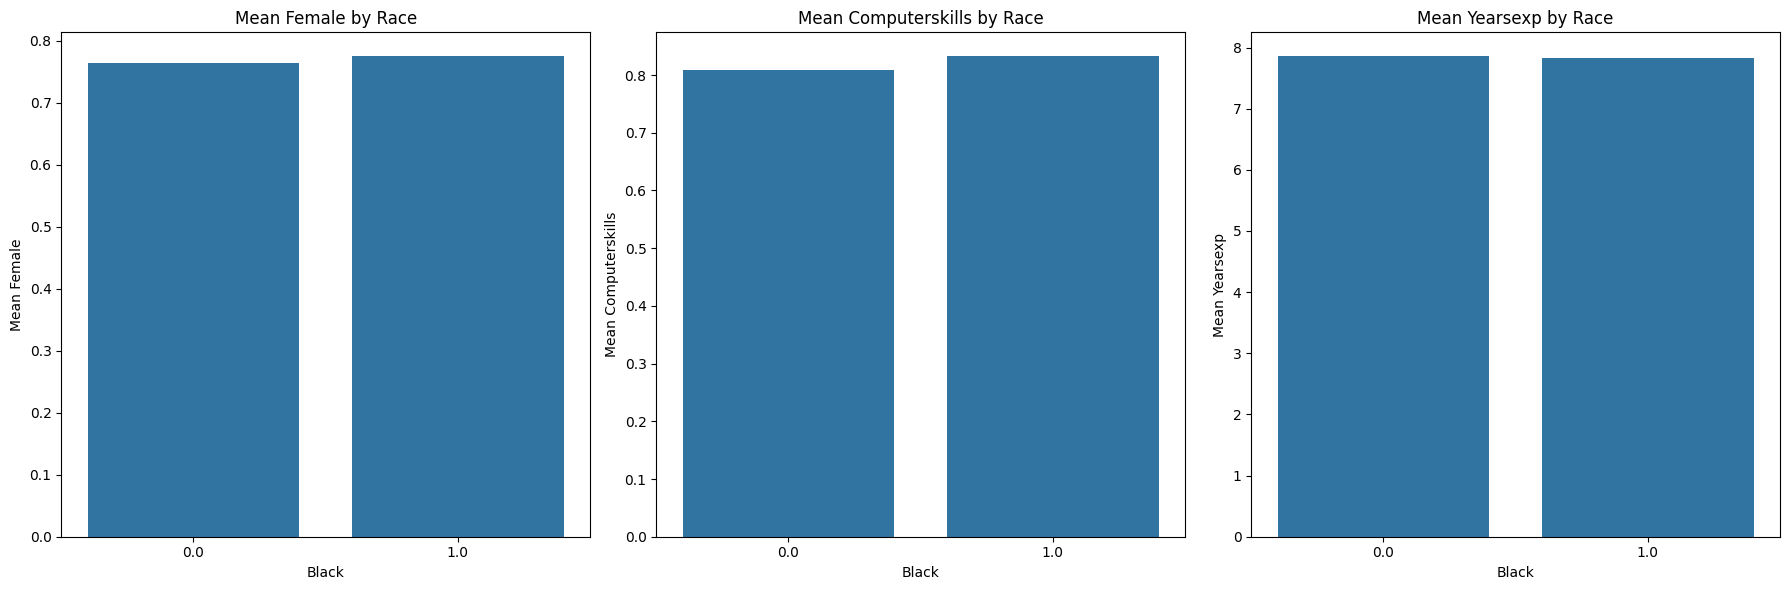

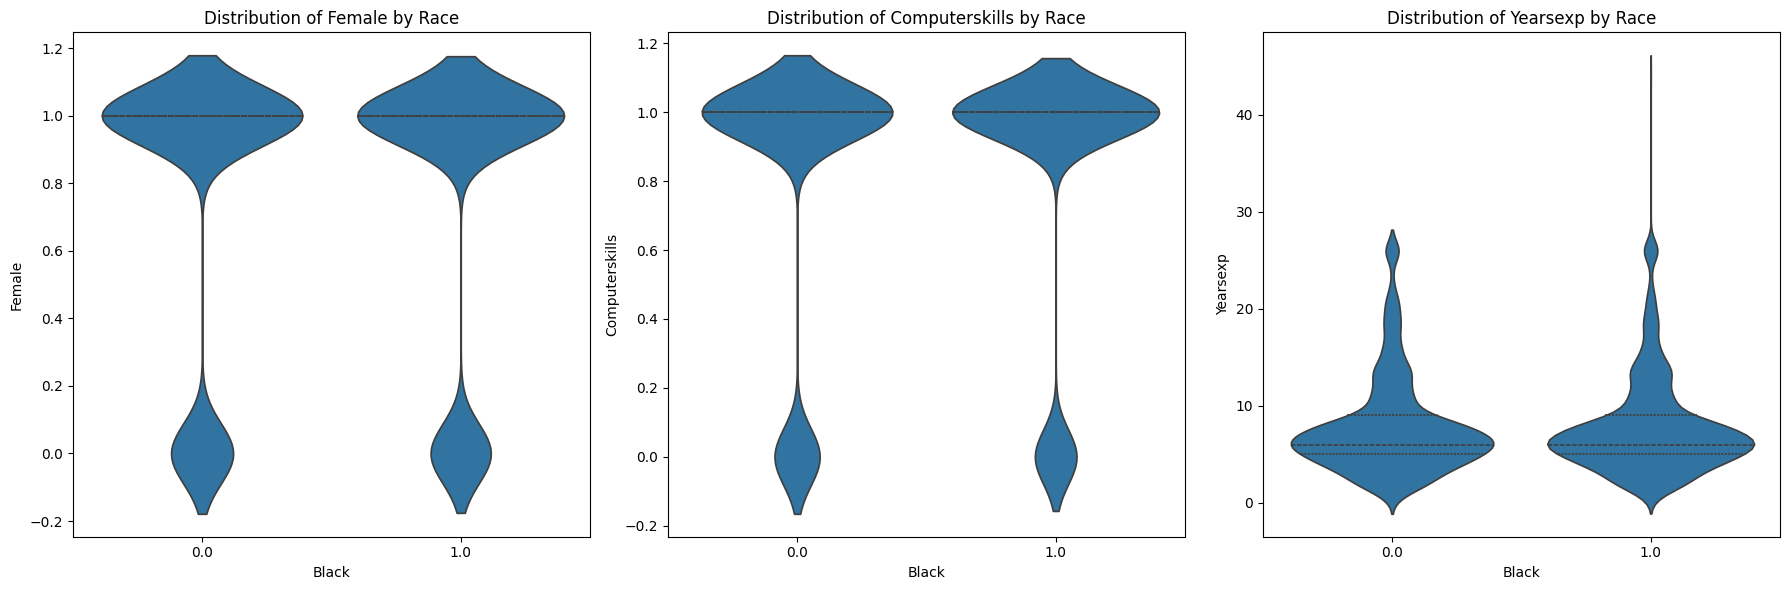

In [26]:
# plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

# bar plots for mean values
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
variables = ["female", "computerskills", "yearsexp"]
for i, var in enumerate(variables):
    sns.barplot(x="black", y=var, data=resume, ax=axes[i], ci=None)
    axes[i].set_title(f"Mean {var.capitalize()} by Race")
    axes[i].set_xlabel("Black")
    axes[i].set_ylabel(f"Mean {var.capitalize()}")
plt.tight_layout()

# violin plots for detailed distribution view
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, var in enumerate(variables):
    sns.violinplot(x="black", y=var, data=resume, ax=axes[i], inner="quartile")
    axes[i].set_title(f"Distribution of {var.capitalize()} by Race")
    axes[i].set_xlabel("Black")
    axes[i].set_ylabel(var.capitalize())
plt.tight_layout()

plt.show()

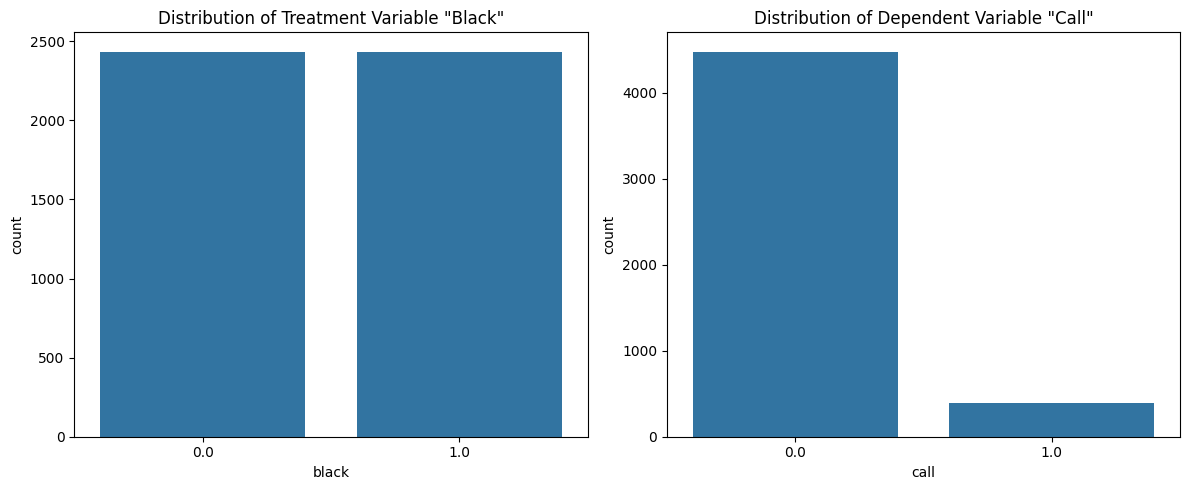

In [27]:
# plotting treatment variable "black" and dependent variable "call" separately

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# treatment variable "black"
sns.countplot(data=resume, x="black", ax=axes[0])
axes[0].set_title('Distribution of Treatment Variable "Black"')

# dependent variable "call"
sns.countplot(data=resume, x="call", ax=axes[1])
axes[1].set_title('Distribution of Dependent Variable "Call"')

plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import ttest_ind

# ttest_ind helps in assessing whether the differences observed in the outcomes
# (like call-back rates for job applications) between two groups (e.g., Black-named
# vs. White-named fictitious applicants) are likely to be real or if they
# could have occurred by chance.

# calculate means for each group
means_black = resume[resume["black"] == 1][
    ["female", "computerskills", "yearsexp"]
].mean()
means_non_black = resume[resume["black"] == 0][
    ["female", "computerskills", "yearsexp"]
].mean()

# calculate differences in means
difference_means = means_black - means_non_black

# perform t-tests
ttest_results_female = ttest_ind(
    resume[resume["black"] == 1]["female"], resume[resume["black"] == 0]["female"]
)
ttest_results_computerskills = ttest_ind(
    resume[resume["black"] == 1]["computerskills"],
    resume[resume["black"] == 0]["computerskills"],
)
ttest_results_yearsexp = ttest_ind(
    resume[resume["black"] == 1]["yearsexp"], resume[resume["black"] == 0]["yearsexp"]
)

results = {}
# store p-values, rounding to 2 decimal places
ex2_pvalue_female = round(ttest_results_female.pvalue, 2)
results["ex2_pvalue_female"] = ex2_pvalue_female

ex2_pvalue_computerskills = round(ttest_results_computerskills.pvalue, 2)
results["ex2_pvalue_computerskills"] = ex2_pvalue_computerskills

ex2_pvalue_yearsexp = round(ttest_results_yearsexp.pvalue, 2)
results["ex2_pvalue_yearsexp"] = ex2_pvalue_yearsexp


print("Differences in means (Black vs Non-Black):", difference_means)
print("P-value for 'female':", ex2_pvalue_female)
print("P-value for 'computerskills':", ex2_pvalue_computerskills)
print("P-value for 'yearsexp':", ex2_pvalue_yearsexp)

Differences in means (Black vs Non-Black): female            0.010678
computerskills    0.023819
yearsexp         -0.026694
dtype: float64
P-value for 'female': 0.38
P-value for 'computerskills': 0.03
P-value for 'yearsexp': 0.85


### Exercise 3

Do a similar tabulation for education (`education`). Education is a categorical variable coded as follows:

- 0: Education not reported
- 1: High school dropout
- 2: High school graduate
- 3: Some college
- 4: College graduate or higher

Because these are categorical, you shouldn't just calculate and compare means—you should compare share or count of observations with each value (e.g., a chi-squared contingency table). You may also find the `pd.crosstab` function useful.

Does education look balanced across racial groups?

Store the p-value from your chi squared test in results under the key `ex3_pvalue_education`. **Please round to 2 decimal places.**

In [29]:
from scipy.stats import chi2_contingency

# create a cross-tabulation of education levels by racial groups
education_crosstab = pd.crosstab(resume["education"], resume["black"])

# perform the chi-squared test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(education_crosstab)

# round the p-value to 2 decimal places
ex3_pvalue_education = round(p_value, 2)
results["ex3_pvalue_education"] = ex3_pvalue_education

# output the p-value
print(f"P-value for education balance across racial groups: {ex3_pvalue_education}")

P-value for education balance across racial groups: 0.49


### Exercise 4

What do you make of the overall results on resume characteristics? Why do we care about whether these variables look similar across the race groups? And if they didn't look similar, would that be a threat to internal or external validity? 

Answer in markdown, then also store your answer to the question of whether imbalances are a threat to internal or external validity in `"ex4_validity"` as the string `"internal"` or `"external"`.


>In research examining the impact of race on job call-back rates, ensuring that resume characteristics like gender, computer skills, years of experience, and education are balanced across racial groups is critical for the study's integrity. This balance allows for a fair comparison between Black-named and White-named resumes, ensuring that any observed differences in outcomes can be attributed to the race variable rather than other factors. It aids in making accurate causal inferences by controlling for potential confounders, thereby isolating the effect of racial bias from other variables. If these characteristics were not balanced, it would threaten the study's internal validity, undermining its ability to establish a direct causal relationship between race and call-back rates. Ensuring such balance is essential not only for the credibility of the study's findings but also for maintaining its internal validity, which is the focus in this context over external validity.

In [30]:
results["ex4_validity"] = "internal"

## Estimating Effect of Race

### Exercise 5

The variable of interest in the data set is the variable `call`, which indicates a call back for an interview. Perform a two-sample t-test comparing applicants with black sounding names and white sounding names.

Interpret your results—in both percentage *and* in percentage points, what is the effect of having a Black-sounding name (as opposed to a White-sounding name) on your resume?

Store how much more likely a White applicant is to receive a call back than a Black respondent in percentage and percentage points in `"ex5_white_advantage_percent"`and `"ex5_white_advantage_percentage_points"`. Please scale percentages so 1 is 1% and percentage points so a value of `1` corresponds to 1 percentage point. **Please round these answers to 2 decimal places.**

Store the p-value of the difference in `"ex5_pvalue"` **Please round your p-value to 5 decimal places.**

In [31]:
# calculate mean call-back rates for both groups
mean_call_black = resume[resume["black"] == 1]["call"].mean()
mean_call_white = resume[resume["black"] == 0]["call"].mean()

# perform two-sample t-test
t_stat, p_value = ttest_ind(
    resume[resume["black"] == 1]["call"], resume[resume["black"] == 0]["call"]
)

# calculate the effect in percentage and percentage points
effect_percentage_points = (
    mean_call_white - mean_call_black
) * 100  # In percentage points
effect_percentage = (
    (mean_call_white / mean_call_black) - 1
) * 100  # How much more likely in percentage

# round the answers
ex5_white_advantage_percent = round(effect_percentage, 2)
results["ex5_white_advantage_percent"] = ex5_white_advantage_percent

ex5_white_advantage_percentage_points = round(effect_percentage_points, 2)
results["ex5_white_advantage_percentage_points"] = ex5_white_advantage_percentage_points

ex5_pvalue = p_value
results["ex5_pvalue"] = round(ex5_pvalue, 5)

print(f"White advantage in percent: {ex5_white_advantage_percent}%")
print(
    f"White advantage in percentage points: {ex5_white_advantage_percentage_points} percentage points"
)
print(f"P-value: {ex5_pvalue:.5f}")

White advantage in percent: 49.68%
White advantage in percentage points: 3.2 percentage points
P-value: 0.00004


### Exercise 6

Now, use a linear probability model (a linear regression with a 0/1 dependent variable!) to estimate the differential likelihood of being called back by applicant race (i.e. the racial discrimination by employers). Please use [statsmodels](https://www.statsmodels.org/stable/index.html).

Since we have a limited dependent variable, be sure to use [heteroskedastic robust standard errors.](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.get_robustcov_results.html) Personally, I prefer the `HC3` implementation, as it tends to do better with smaller samples than other implementations.

Interpret these results—what is the *effect* of having a Black-sounding name (as opposed to a White-sounding name) on your resume in terms of the likelihood you'll be called back? 

How does this compare to the estimate you got above in exercise 5?

Store the p-value associated with `black` in `"ex6_black_pvalue"`. **Please round your pvalue to 5 decimal places.**

In [32]:
import statsmodels.api as sm


# define the independent variable (adding a constant term for the intercept)
X = sm.add_constant(resume["black"])

# define the dependent variable
y = resume["call"]

# fit the linear regression model using OLS
model = sm.OLS(y, X).fit(cov_type="HC3")  # Using HC3 robust standard errors

# get the summary of the regression results
print(model.summary())

# extract the p-value for the 'black' coefficient
ex6_black_pvalue = model.pvalues["black"]
results["ex6_black_pvalue"] = round(ex6_black_pvalue, 5)

# output the p-value
print(f"P-value for 'black': {ex6_black_pvalue:.5f}")

                            OLS Regression Results                            
Dep. Variable:                   call   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     16.92
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           3.96e-05
Time:                        21:11:45   Log-Likelihood:                -562.24
No. Observations:                4870   AIC:                             1128.
Df Residuals:                    4868   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0965      0.006     16.121      0.0

>The p-value of this model is as same as the value in exercise 5.

>The results indicate that having a Black-sounding name has a significant negative effect on the likelihood of being called back for a job interview compared with a White-sounding name. From exercise 5, we observe that there is a White advantage of approximately 49.68%, meaning that individuals with White-sounding names are nearly 50% more likely to receive a callback compared to those with Black-sounding names. Additionally, the difference in callback rates between White and Black applicants is approximately 3.2 percentage points, indicating a substantial disparity in employment opportunities based on racial stereotypes. Furthermore, from exercise 6, the coefficient for the 'black' variable in the OLS regression results is -0.0320 with a p-value of 0.00004. This indicates that the likelihood of being called back for an interview decreases by 3.2 percentage points when an applicant has a Black-sounding name compared to a White-sounding name. In conclusion, these results suggest that racial bias, as evidenced by the differential treatment of resumes based on the perceived race of the applicant's name, significantly impacts the likelihood of receiving a callback for a job interview in the United States.

### Exercise 7

Even when doing a randomized experiment, adding control variables to your regression *can* improve the statistical efficiency of your estimates of the treatment effect (the upside is the potential to explain residual variation; the downside is more parameters to be estimated). Adding controls can be particularly useful when randomization left some imbalances in covariates (which you may have seen above). 

Now let's see if we can improve our estimates by adding in other variables as controls. Add in `education`, `yearsexp`, `female`, and `computerskills`—be sure to treat education as a categorical variable!

In [33]:
import statsmodels.formula.api as smf

# fit the model
new_model = smf.ols(
    "call ~ black + C(education) + ofjobs + yearsexp + female + computerskills",
    data=resume,
).fit()

# standard error
robust_new_model = new_model.get_robustcov_results(cov_type="HC3")

# summary
robust_new_model_summary = robust_new_model.summary()

print(robust_new_model_summary)

                            OLS Regression Results                            
Dep. Variable:                   call   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.982
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           4.42e-05
Time:                        21:11:45   Log-Likelihood:                -550.73
No. Observations:                4870   AIC:                             1121.
Df Residuals:                    4860   BIC:                             1186.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0860      0.04

## Estimating Heterogeneous Effects

### Exercise 8

As you may recall from some past readings (such as this one on the [migraine medication Aimovig](https://ds4humans.com/30_questions/15_answering_exploratory_questions.html#faithful-representations)), our focus on estimating *Average Treatment Effects* runs the risk of papering over variation in how individuals respond. In the case of Aimovig, for example, nearly no patients actually experienced the Average Treatment Effect of the medication; around half of patients experienced no benefit, while the other half experienced a benefit of about twice the average treatment effect.

So far in this analysis we've been focusing on the *average* effect of having a Black-sounding name (as compared to a White-sounding name). But we can actually use our regression framework to look for evidence of *heterogeneous treatment effects*—effects that are different for different types of people in our data. We accomplish this by *interacting* a variable we think may be related to experiencing a differential treatment effect with our treatment variable. For example, if we think that applicants with Black-sounding names who have a college degree are likely to experience less discrimination, we can interact `black` with an indicator for having a college degree. If having a college degree reduces discrimination, we could expect the interaction term to be positive. 

Is there more or less racial discrimination (the absolute magnitude difference in call back rates between Black and White applicants) among applicants who have a college degree? Store your answer as the string `"more discrimination"` or `"less discrimination"` under the key `"ex8_college_heterogeneity"`.

Please still include `education`, `yearsexp`, `female`, and `computerskills` as controls.

**Note:** it's relatively safe to assume that someone hiring employees who sees a resume that does *not* report education levels will assume the applicant does not have a college degree. So treat "No education reported" as "not having a college degree."

In percentage points, what is the difference in call back rates:

- between White applicants without a college degree and Black applicants without a college degree (`ex8_black_nocollege`).
- between White applicants with a college degree and Black applicants with a college degree (`ex8_black_college`).

Use negative values to denote a lower probability for Black applicants to get a call back. **Scale so a value of `1` is a one percentage point difference. Please round your answer to 2 percentage points.**

Focus on the coefficient values, even if the significance is low.

In [34]:
# create an interaction term between 'black' and an indicator variable for having a college degree or higher (education = 4)
resume["black_college"] = resume["black"] * (resume["education"] == 4)

# define the model formula including interaction terms and control variables
formula = (
    "call ~ black + black_college + C(education) + yearsexp + female + computerskills"
)

# fit the linear regression model using OLS with HC3 robust standard errors
model = smf.ols(formula, data=resume).fit(cov_type="HC3")

# print the summary of the regression results
print(model.summary())

# extract the coefficient values to determine the difference in callback rates
black_coefficient = model.params["black"]
black_college_interaction = model.params["black_college"]

# determine the effect of having a Black-sounding name without and with a college degree
ex8_black_nocollege = -black_coefficient * 100  # Convert to percentage points
ex8_black_college = (
    -(black_coefficient + black_college_interaction) * 100
)  # Convert to percentage points

# determine whether discrimination is more or less among applicants with a college degree
ex8_college_heterogeneity = (
    "less discrimination" if black_college_interaction > 0 else "more discrimination"
)
results["ex8_college_heterogeneity"] = ex8_college_heterogeneity

# round the answers to 2 decimal points
ex8_black_nocollege = round(ex8_black_nocollege, 2)
results["ex8_black_nocollege"] = -ex8_black_nocollege

ex8_black_college = round(ex8_black_college, 2)
results["ex8_black_college"] = -ex8_black_college

print(
    f"Difference in call back rates for Black applicants without a college degree: {ex8_black_nocollege} percentage points"
)
print(
    f"Difference in call back rates for Black applicants with a college degree: {ex8_black_college} percentage points"
)
print(
    f"Is there more or less racial discrimination among applicants who have a college degree? {ex8_college_heterogeneity}"
)

                            OLS Regression Results                            
Dep. Variable:                   call   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.952
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           4.93e-05
Time:                        21:11:45   Log-Likelihood:                -550.76
No. Observations:                4870   AIC:                             1122.
Df Residuals:                    4860   BIC:                             1186.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0875      0.04

### Exercise 9

Now let's compare men and women—is the penalty for having a Black-sounding name greater for Black men or Black women? Store your answer as `"greater discrimination for men"` or `"greater discrimination for women"` in `"ex9_gender_and_discrimination"`.

Focus on the coefficient values, even if the significance is low.

Again, please still include `education`, `yearsexp`, `female`, and `computerskills` as controls.

In [35]:
model_gender_interaction = smf.ols(
    "call ~ black * female + C(education) + yearsexp + computerskills", data=resume
).fit()

# obtain robust standard errors
model_gender_interaction_robust = model_gender_interaction.get_robustcov_results(
    cov_type="HC3"
)
print(model_gender_interaction_robust.summary())


interaction_coefficient = model_gender_interaction.params["black:female"]

print(
    f"The coefficient for the interaction between black and female is {interaction_coefficient:.4f}."
)

# determine the direction of discrimination based on the interaction term's coefficient
if interaction_coefficient < 0:
    ex9_gender_and_discrimination = "greater discrimination for women"
else:
    ex9_gender_and_discrimination = "greater discrimination for men"


results["ex9_gender_and_discrimination"] = ex9_gender_and_discrimination

                            OLS Regression Results                            
Dep. Variable:                   call   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.866
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           6.76e-05
Time:                        21:11:45   Log-Likelihood:                -551.00
No. Observations:                4870   AIC:                             1122.
Df Residuals:                    4860   BIC:                             1187.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0807      0.04

### Exercise 10

Calculate and/or lookup the following online:

- What is the share of applicants in our dataset with college degrees?
- What share of Black adult Americans have college degrees (i.e. have completed a bachelors degree)?

Is the share of Black applicants with college degrees in this data `"greater"`, or `"less"` than in the US? Store your answer as one of those strings in `"ex10_experiment_v_us"`

In [36]:
# calculate the total number of applicants
total_applicants = len(resume)

# calculate the number of applicants with college degrees
college_graduates = len(resume[resume["education"] == 4])

# calculate the share of applicants with college degrees
share_college_degrees = (college_graduates / total_applicants) * 100

print(f"Share of applicants with college degrees: {share_college_degrees:.2f}%")

Share of applicants with college degrees: 71.95%


>The share of applicants in our dataset with college degrees is 71.95%. The share of Black adult Americans with college degrees, as derived from [The Hechinger Report](https://hechingerreport.org/proof-points-new-higher-ed-data-by-race-and-ethnicity/) and [Pew Research Center](https://www.pewresearch.org/short-reads/2022/04/12/10-facts-about-todays-college-graduates/), is about 34%​​​​. In this case, the share of Black applicants with college degrees in this data is greater than in the US.

In [37]:
results["ex10_experiment_v_us"] = "greater"

### Exercise 11

Bearing in mind your answers to Exercise 8 and to Exercise 10, how do you think the Average Treatment Effect you estimated in Exercises 5 and 6 might generalize to the experience of the average Black American (i.e., how do you think the ATE for the average Black American would compare to the ATE estimated from this experiment)?


>From Exercises 5 and 6, we see that there is a significant negative effect associated with having a Black-sounding name in terms of callback rates for interviews. The ATE indicates that applicants with White-sounding names are nearly 50% more likely to receive a callback than those with Black-sounding names, with a difference in callback rates of about 3.2 percentage points. Exercise 8 suggests that there is less discrimination against Black applicants who have a college degree compared to those without. However, there is still a negative effect on the callback rate for Black applicants with a college degree. Exercise 10 reveals that the proportion of Black applicants with college degrees in the dataset is higher than the national average for Black adult Americans. This could imply that the sample may not be entirely representative of the general Black American population's educational attainment. In this case, the ATE for the average Black American would likely be different from the ATE estimated from this experiment. It could be greater due to lower average educational attainment and possibly different patterns of discrimination based on gender and other factors not captured by the study. The study's ATE might be more optimistic than what the average Black American experiences in the job market.

>

### Exercise 12

What does your answer to Exercise 10 imply about the study's *internal* validity?

>In Exercise 10, it was found that the share of Black applicants with college degrees in the study's sample is greater than the share of Black adult Americans with college degrees in the general US population. In this case, the overrepresentation of college-educated individuals in the sample does pose a challenge to the study's internal validity, particularly concerning the generalizability of the ATE to the broader population. It implies that the estimated treatment effects might be specific to a subgroup within the population (college-educated Black Americans) rather than reflective of the treatment effect on the population as a whole. This highlights the importance of ensuring that samples are representative of the population for which conclusions are being drawn, especially in studies aiming to inform policy or broader social understandings.

>

### Exercise 13

What does your answer to Exercise 10 imply about the study's *external* validity?

>External validity refers to the extent to which the study's findings can be generalized to other settings, populations, or time periods. In this case, the overrepresentation of college-educated individuals suggests that the study's results, including the estimated ATE of having a Black-sounding name on callback rates, might not accurately generalize to the entire population of Black Americans. This discrepancy implies that while the study provides valuable insights into the effects of racial discrimination in hiring practices, its conclusions might be more applicable to a subset of the population (i.e., college-educated Black Americans) rather than the average Black American, thus limiting the generalizability of the findings.

>

## What Did We Just Measure?

It's worth pausing for a moment to think about exactly what we've measured in this experiment. Was it the effect of race on hiring? Or the difference in the experience of the average White job applicant from the average Black job applicant?

Well... no. What we have measured in this experiment is **just** the effect of having a Black-sounding name (as opposed to a White-sounding name) on your resume on the likelihood of getting a followup call from someone hiring in Boston or Chicago given identical resumes. In that sense, what we've measured is a small *piece* of the difference in the experience of Black and White Americans when seeking employment. As anyone looking for a job knows, getting a call-back is obviously a crucial step in getting a job, so this difference—even if it's just one part of the overall difference—is remarkable.

In [38]:
assert set(results.keys()) == {
    "ex2_pvalue_computerskills",
    "ex2_pvalue_female",
    "ex2_pvalue_yearsexp",
    "ex3_pvalue_education",
    "ex4_validity",
    "ex5_pvalue",
    "ex5_white_advantage_percent",
    "ex5_white_advantage_percentage_points",
    "ex6_black_pvalue",
    "ex8_black_college",
    "ex8_black_nocollege",
    "ex8_college_heterogeneity",
    "ex9_gender_and_discrimination",
    "ex10_experiment_v_us",
}

In [39]:
results

{'ex2_pvalue_female': 0.38,
 'ex2_pvalue_computerskills': 0.03,
 'ex2_pvalue_yearsexp': 0.85,
 'ex3_pvalue_education': 0.49,
 'ex4_validity': 'internal',
 'ex5_white_advantage_percent': 49.68,
 'ex5_white_advantage_percentage_points': 3.2,
 'ex5_pvalue': 4e-05,
 'ex6_black_pvalue': 4e-05,
 'ex8_college_heterogeneity': 'less discrimination',
 'ex8_black_nocollege': -4.05,
 'ex8_black_college': -2.82,
 'ex9_gender_and_discrimination': 'greater discrimination for women',
 'ex10_experiment_v_us': 'greater'}